In [1]:
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adamax ,Adagrad, Adadelta
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D

In [2]:
#Downloaded the EMNIST (Balanced) Train-Test Datasets from Kaggle and imported them from my device.
train_data = pd.read_csv("C:/Users/VAIBHAVI/Downloads/emnist-balanced-train.csv/emnist-balanced-train.csv",header=None)
test_data = pd.read_csv("C:/Users/VAIBHAVI/Downloads/emnist-balanced-test.csv/emnist-balanced-test.csv",header = None)

In [3]:
# Printing the initial five datasets to understand their structure.
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Printing the summary statistics of the training data to gain insights into its distribution and characteristics.
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
# Imported the emnist-balanced-mapping txt file from my device.
label_map = pd.read_csv("C:/Users/VAIBHAVI/Downloads/emnist-balanced-mapping.txt",delimiter = ' ', index_col = 0, header = None)

# Convert DataFrame to Series by accessing the first column as it's easier to enumerate over a series object than over a dataframe.
label_map_series = label_map.iloc[:, 0]

In [6]:
#Understanding the mapping txt dataset by printing first five datasets
label_map_series.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [7]:
# Constructing a dictionary to store the label mappings, helping us understand the 
# correspondence between integers and their associated alphabet characters (both lowercase and uppercase) or digits.
label_dictionary = {}

# Following the ASCII code standards, we've established the mapping between alphabet characters 
#(both lowercase and uppercase) or digits and stored it in the label_dictionary dictionary.
for index,label in enumerate(label_map_series):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [8]:
# Separating the features (independent variables) and labels (dependent variable) 
# from the training dataset in preparation for modeling.
y_train = np.array(train_data.iloc[:,0].values)

# Convert DataFrames to NumPy arrays
X_train = np.array(train_data.iloc[:,1:].values)

# Normalizing the pixel values of the training and testing data to the range [0, 1]
# by dividing each pixel value by 255.0, ensuring numerical stability and faster convergence during model training.
X_train = X_train.astype('float32') / 255

# This reshaping is necessary to match the input shape expected by the CNN model.
X_train = X_train.reshape((-1, 28, 28, 1))

In [9]:
# Separating the features (independent variables) and labels (dependent variable) 
# from the testing dataset in preparation for modeling.
y_test = np.array(test_data.iloc[:,0].values)

# Convert DataFrames to NumPy arrays
X_test = np.array(test_data.iloc[:,1:].values)

# Normalizing the pixel values of the training and testing data to the range [0, 1]
# by dividing each pixel value by 255.0, ensuring numerical stability and faster convergence during model training.
X_test = X_test.astype('float32') / 255

# This reshaping is necessary to match the input shape expected by the CNN model.
X_test = X_test.reshape((-1, 28, 28, 1))

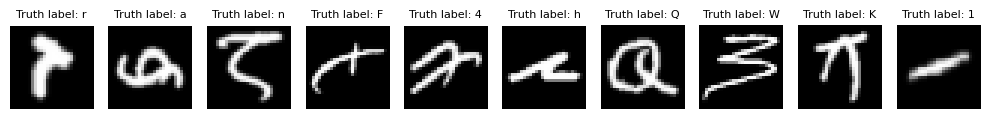

In [10]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(1, 10, figsize=(10, 4))  # Adjust figsize as needed

for i in range(10):
    grid_data = X_train[i].reshape(28, 28) # To create a grid image we need to reshape the data
    axes[i].imshow(grid_data, interpolation='none', cmap='gray') # Displaying the image with no interpolation and grayscale colormap.
    axes[i].set_title(f"Truth label: {label_dictionary[y_train[i]]}", fontsize = 8)  # Set title with label
    axes[i].axis('off')  # Hide axis
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Model Building for CNN - activations(using Relu), optimizer-(Adam), Batching(100 samples), DropOutLayer-Active, No Regularization

In [11]:
# For CNN; Splitting the training data into training and validation sets with a validation dataset size of 20%. 
# The random state parameter ensures consistency in dataset splitting across multiple runs.
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# Creating different optimizers with different initial learning rates to include them as hyperparameters in our model training process.
# By experimenting , we can determine which combination works best for our specific problem. This allows us to tune 
# the optimization process to potentially achieve better performance and faster convergence during training.
adam_optimizer = Adam(learning_rate=0.001)
sgd_optimizer = SGD(learning_rate=0.01)
rmsprop_optimizer = RMSprop(learning_rate=0.001)
adagrad_optimizer = Adagrad(learning_rate=0.01)
adadelta_optimizer = Adadelta(learning_rate=0.01)

In [13]:
# Convert labels to one-hot encoded vectors for categorical classification. This conversion is essential for
# categorical classification tasks where labels represent distinct categories. It changes integer labels into a binary matrix.
# Each row corresponds to a sample, and each column corresponds to a class, with 1 indicating the class presence and 0 otherwise.
y_train_categorical = tf.keras.utils.to_categorical(y_trainn, 47)
y_val_categorical = tf.keras.utils.to_categorical(y_val, 47)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 47)

In [14]:
# Define a learning rate scheduler using cosine annealing decay for hyperparameter tuning
def cosine_annealing_decay(epoch, T=10):
    max_lr = 0.001
    min_lr = 0.0
    return min_lr + 0.5 * (max_lr - min_lr) * (1 + math.cos(epoch / T * math.pi))

# Define a learning rate scheduler using step decay for hyperparameter tuning
def step_decay(epoch,lr):
    drop_rate = 0.5
    epochs_drop = 10
    return lr * drop_rate ** (np.floor((1 + epoch) / epochs_drop))

Choosing the Best CNN Model with HyperParameter Tuning

In [15]:
def build_model(hp):
    # Define the CNN neural network model architecture
    # Constructing the CNN model architecture using a Sequential model
    model_Convolutional_Layer = Sequential()
    # First convolutional layer with 32 filters, each of size 3x3, using specified input shape
    # The input shape is specified to match the dimensions of the input images 
    # Specifying different choice of other parameters for exploring and getting the best hyperparameters
    model_Convolutional_Layer.add(Conv2D(32,
                     kernel_size=(3,3), padding='same',
                     activation=hp.Choice('first_activation_layer', values=['relu', 'elu', 'leaky_relu','tanh']),
                     input_shape=(28, 28, 1),kernel_regularizer=keras.regularizers.l1_l2(l1=hp.Choice('l1', values=[0.0, 0.01, 0.001]), l2=hp.Choice('l2', values=[0.0, 0.01,0.001]))))
    # Add batch normalization layer if chosen as a hyperparameter
    if hp.Boolean('batch_normalization'):
        model_Convolutional_Layer.add(BatchNormalization())
    # Add max pooling layer
    model_Convolutional_Layer.add(MaxPooling2D(pool_size=(3, 3)))
    # Add the second convolutional layer with specified parameters
    model_Convolutional_Layer.add(Conv2D(128,
                     kernel_size=(3,3),padding='same',
                     activation=hp.Choice('second_activation_layer', values=['relu', 'elu', 'leaky_relu','sigmoid'])))
    # Add batch normalization layer if chosen as a hyperparameter
    if hp.Boolean('batch_normalization'):
        model_Convolutional_Layer.add(BatchNormalization())
    # Add max pooling layer
    model_Convolutional_Layer.add(MaxPooling2D(pool_size=(3, 3)))
    # Add the third convolutional layer with specified parameters
    model_Convolutional_Layer.add(Conv2D(128,
                     kernel_size=(3,3),padding='same',
                     activation=hp.Choice('third_activation_layer', values=['relu', 'elu', 'leaky_relu','tanh']),
                     kernel_regularizer=keras.regularizers.l1_l2(l1=hp.Choice('l1', values=[0.0, 0.001]), l2=hp.Choice('l2', values=[0.0, 0.001]))))
    # Add batch normalization layer if chosen as a hyperparameter
    if hp.Boolean('batch_normalization'):
        model_Convolutional_Layer.add(BatchNormalization())
    # Flatten layer to convert the 2D output to a 1D array By flattening the output, we ensure that the features extracted by the 
    # convolutional layers can be fed into the dense layers for further processing and classification.
    model_Convolutional_Layer.add(Flatten())
    # Add dropout layer if chosen as a hyperparameter
    if hp.Choice('dropout', values=[0.0, 0.2]) > 0.0:
        model_Convolutional_Layer.add(Dropout(hp.Choice('dropout', values=[0.0, 0.2])))
    # Add fully connected dense layers with specified choice of activation functions and regularization
    model_Convolutional_Layer.add(Dense(512, activation=hp.Choice('third_activation_layer', values=['relu', 'leaky_relu', 'elu']), kernel_regularizer=keras.regularizers.l1_l2(l1=hp.Choice('l1', values=[0.0, 0.001]), l2=hp.Choice('l2', values=[0.0, 0.001]))))
    model_Convolutional_Layer.add(Dense(256, activation=hp.Choice('third_activation_layer', values=['relu', 'leaky_relu', 'elu']), kernel_regularizer=keras.regularizers.l1_l2(l1=hp.Choice('l1', values=[0.0, 0.001]), l2=hp.Choice('l2', values=[0.0, 0.001]))))
    # Add output layer with softmax activation for multiclass classification
    model_Convolutional_Layer.add(Dense(47, activation='softmax'))  # 47 classes
    # Compile the model with specified loss function, metrics and choice of optimizer
    model_Convolutional_Layer.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.get(hp.Choice('optimizer', values=['sgd', 'rmsprop', 'adam'])), metrics=['accuracy'])
    return model_Convolutional_Layer

In [16]:
# Hyperparameter tuning with RandomSearch using keras-tuner to find the best combination of hyperparameters for CNN model.

# Callbacks are defined for learning rate scheduling during training.
callbacks = [
    LearningRateScheduler(cosine_annealing_decay),  
    LearningRateScheduler(step_decay)
]

# Instantiate the RandomSearch tuner
# RandomSearch is configured with the objective to maximize validation accuracy (val_accuracy) and a maximum of 10 trials.
tuner_cnn = RandomSearch(
    build_model, # Function to build the CNN model with hyperparameters
    objective='val_accuracy', # Objective to optimize (validation accuracy)
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of executions per trial
    directory = 'CNN_Dirrr' # Directory to save tuning results
)

# The tuner performs the hyperparameter search over the specified number of epochs using the training and validation datasets.
tuner_cnn.search(X_trainn, y_train_categorical, epochs=4, validation_data=(X_val, y_val_categorical),callbacks=callbacks)

# Get the best hyperparameters. After the search, the best hyperparameters are retrieved,
# including activation functions for convolutional layers, optimizer choice, dropout rate, and batch normalization.
best_hps = tuner_cnn.get_best_hyperparameters(num_trials=1)[0]
first_convolutional_layer = best_hps.get('first_activation_layer')
second_convolutional_layer = best_hps.get('second_activation_layer')
third_convolutional_layer = best_hps.get('third_activation_layer')

# The best hyperparameters are printed for analysis and further use in model training
print("Best Hyperparameters:")
print(f"Activation Function for Convulutional Layer 1: {first_convolutional_layer}")
print(f"Activation Function for Convulutional Layer 2: {second_convolutional_layer}")
print(f"Activation Function for Convulutional Layer 3: {third_convolutional_layer}")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Dropout Rate: {best_hps.get('dropout')}")
print(f"Batch Normalization: {best_hps.get('batch_normalization')}")
print(f"Selected L1 Configuration: {best_hps.get('l1')}")
print(f"Selected L2 Configuration:{best_hps.get('l2')}")

Trial 10 Complete [00h 09m 08s]
val_accuracy: 0.8099290728569031

Best val_accuracy So Far: 0.8719857931137085
Total elapsed time: 00h 52m 00s
Best Hyperparameters:
Activation Function for Convulutional Layer 1: elu
Activation Function for Convulutional Layer 2: relu
Activation Function for Convulutional Layer 3: tanh
Optimizer: rmsprop
Dropout Rate: 0.2
Batch Normalization: False
Selected L1 Configuration: 0.0
Selected L2 Configuration:0.0


Epoch 1/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7080 - loss: 0.9550 - val_accuracy: 0.8550 - val_loss: 0.4279
Epoch 2/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8512 - loss: 0.4263 - val_accuracy: 0.8568 - val_loss: 0.4108
Epoch 3/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8665 - loss: 0.3720 - val_accuracy: 0.8666 - val_loss: 0.3837
Epoch 4/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8735 - loss: 0.3443 - val_accuracy: 0.8714 - val_loss: 0.3655
Epoch 5/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8811 - loss: 0.3279 - val_accuracy: 0.8754 - val_loss: 0.3578
Epoch 6/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 126s 45ms/step - accuracy: 0.8843 - loss: 0.3154 - val_accuracy: 0.8743 - val_loss: 0.3599
Epoch 7/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 95s 34ms/step - accuracy: 0.8851 - loss: 0.3091 - val_accuracy: 0.8762 - val_loss: 0.3582
Epoch 8/10
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.8871 - los

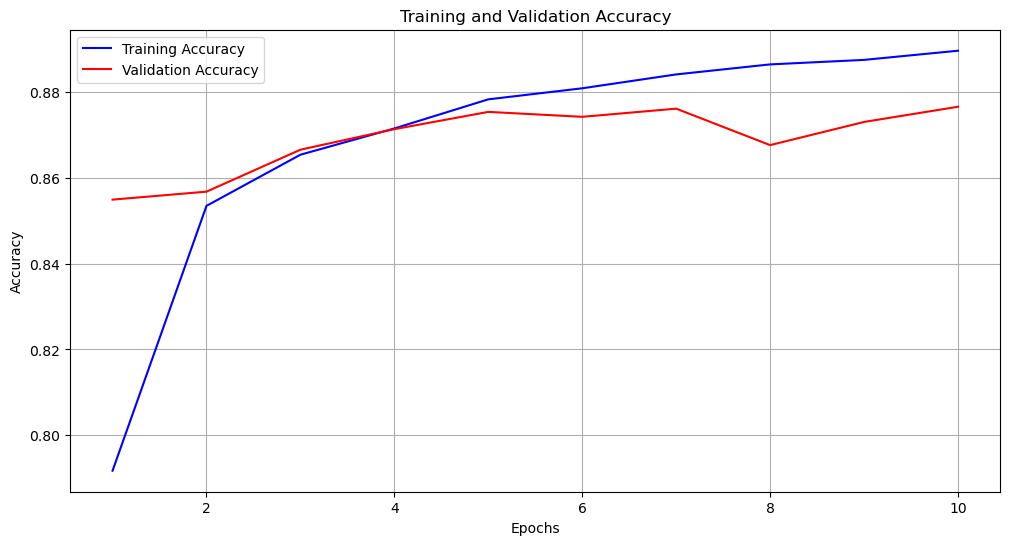

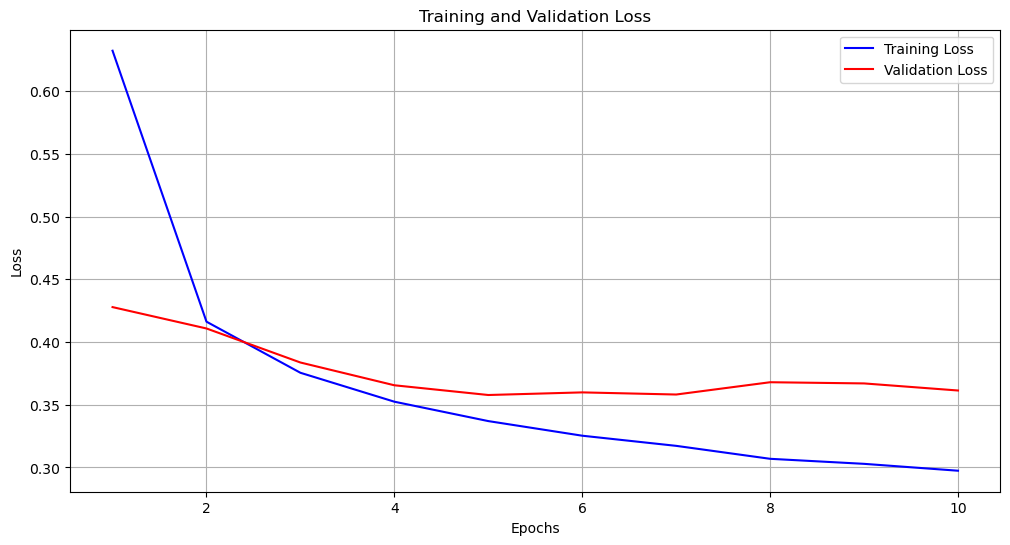

In [17]:
# Build the model with the best hyperparameters
best_CNN = tuner_cnn.hypermodel.build(best_hps)

# To calculate the time taken by model to train
start_time = time.time()

# We use the fit method to train the best_CNN model on the training data (X_trainn) and corresponding labels (y_train_categorical).
# The validation_data argument is used to validate the model's performance on the validation data (X_val, y_val_categorical).
# The training process occurs over a specified number of epochs, with each epoch representing one pass through the entire training dataset.
history_CNN = best_CNN.fit(X_trainn, y_train_categorical, epochs=10, validation_data=(X_val,  y_val_categorical))

# Saving the end time
end_time = time.time()

# Duration to build the model
training_time = end_time-start_time

# Printing the time to build the CNN model
print("Training time :", training_time, "seconds")

# Extract the training metrics from the history
partial_accuracy = history_CNN.history['accuracy']
partial_loss = history_CNN.history['loss']
partial_validation_accuracy = history_CNN.history['val_accuracy']
partial_validation_loss = history_CNN.history['val_loss']

# Retrieve the final metrics
final_accuracy = partial_accuracy[-1]
final_loss = partial_loss[-1]
final_val_accuracy = partial_validation_accuracy[-1]
final_val_loss = partial_validation_loss[-1]

# Print the final training and validation metrics
print("The Final Training Accuracy:", final_accuracy)
print("The Final Training Loss:", final_loss)
print("The Final Validation Accuracy:", final_val_accuracy)
print("The Final Validation Loss:", final_val_loss)

# Evaluate the model on the validation set
test_loss, test_accuracy = best_CNN.evaluate(X_val, y_val_categorical)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Extract the training history for plotting
loss_during_training = history_CNN.history['loss']
loss_during_validation = history_CNN.history['val_loss']
accuracy_during_training = history_CNN.history['accuracy']
accuracy_during_validation = history_CNN.history['val_accuracy']
epochs = range(1, len(loss_during_training) + 1)

# Plot accuracy vs epoch
# We visualize the changes in training accuracy and validation accuracy over each epoch.
# This helps us understand how well the model is learning from the training data and how it performs on unseen validation data.
# The plot provides insights into whether the model is overfitting or underfitting by comparing the training and validation accuracies.
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_during_training, 'b', label='Training Accuracy')
plt.plot(epochs, accuracy_during_validation, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss vs epoch
# We visualize the changes in training loss and validation loss over each epoch.
# Similar to accuracy, this helps us understand how well the model is learning and whether it is overfitting or underfitting.
# A decrease in training loss and validation loss indicates that the model is learning effectively, while a large gap between
# the two suggests overfitting.
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_during_training, 'b', label='Training Loss')
plt.plot(epochs, loss_during_validation, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Convert one-hot encoded y_test to integer labels
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Calculate predictions from the model
best_CNN_prediction = best_CNN.predict(X_test)

# Calculate and print accuracy on testing model for understanding the how well the model has trained 
accuracy = np.mean(np.argmax(best_CNN_prediction, axis=1) == y_test_labels)
print("Accuracy:", accuracy)

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.8720212765957447


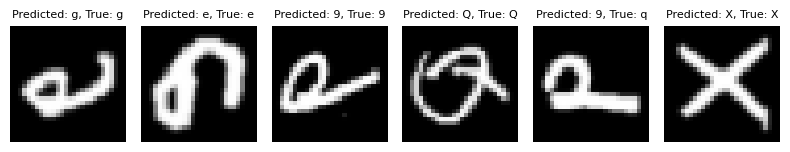

In [33]:
# Extract the top six samples from the testing dataset
top_six_indices = np.arange(6)

# Create a grid of subplots
num_rows = 1
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Iterate through the top six samples and plot them in subplots
for i, idx in enumerate(top_six_indices):
    # Get the image, predicted label, and true label
    image = X_test[idx]
    predicted_label = np.argmax(best_CNN_prediction[idx])
    true_label = np.argmax(y_test_categorical[idx])
    
    # Reshape the image to its original shape (assuming it's grayscale)
    image = image.reshape((28, 28))

    # Plot the image
    ax = axes[i]
    ax.imshow(image, interpolation='none', cmap='gray')
    ax.set_title(f'Predicted: {label_dictionary[predicted_label]}, True: {label_dictionary[true_label]}', fontsize=8)
    ax.axis('off') # Making the visualization cleaner and focusing solely on the images and their associated labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
# Converting the one-hot encoded labels (y_test) into their corresponding categorical labels
true_labels = np.argmax(y_test_categorical, axis=1)

# Convert true_labels to one-hot encoded format
true_labels_onehot = tf.keras.utils.to_categorical(true_labels)

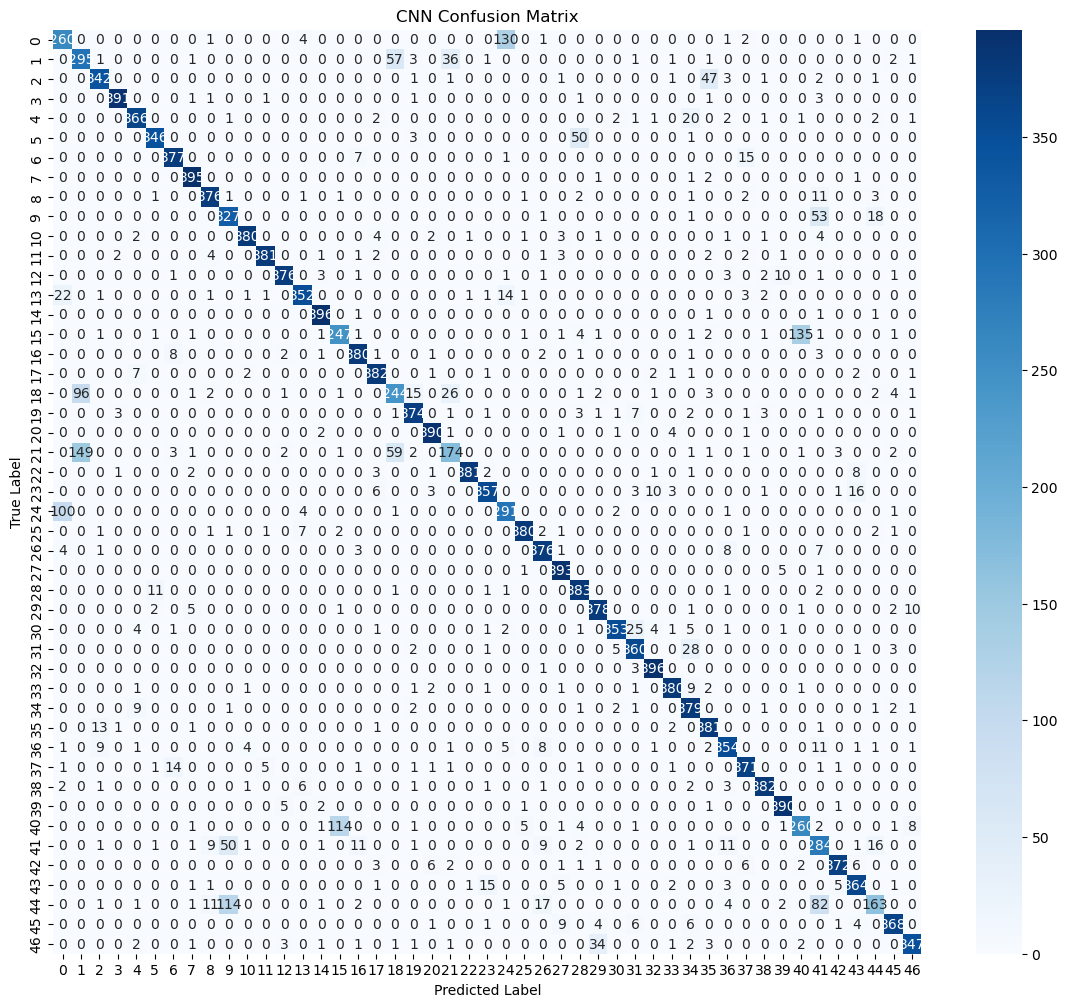

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       400
           1       0.55      0.74      0.63       400
           2       0.92      0.85      0.89       400
           3       0.98      0.98      0.98       400
           4       0.93      0.92      0.92       400
           5       0.95      0.86      0.91       400
           6       0.93      0.94      0.94       400
           7       0.96      0.99      0.97       400
           8       0.92      0.94      0.93       400
           9       0.66      0.82      0.73       400
          10       0.97      0.95      0.96       400
          11       0.98      0.95      0.97       400
          12       0.97      0.94      0.95       400
          13       0.94      0.88      0.91       400
          14       0.97      0.99      0.98       400
          15       0.67      0.62      0.64       400
          16       0.93      0.95      0.94       400


In [35]:
# Calculate confusion matrix for CNN
cnn_conf_matrix = confusion_matrix(np.argmax(true_labels_onehot, axis=1), np.argmax(best_CNN_prediction, axis=1))

# Plot confusion matrix for CNN
plt.figure(figsize=(14, 12))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate classification report for CNN
cnn_classification_report = classification_report(np.argmax(true_labels_onehot, axis=1), np.argmax(best_CNN_prediction, axis=1))
print("CNN Classification Report:")
print(cnn_classification_report)

Building a MLP Neural Network with Hyper-Parameter Tuning

In [36]:
def build_model_mlp(hp):
    # Define the CNN neural network model architecture
    # Constructing the CNN model architecture using a Sequential model
    model_perceptron = Sequential()

    # Add a dense (fully connected) input layer with variable number of units determined by hyperparameter search.
    # The activation function is chosen from a set of options (tanh, elu, leaky_relu) using hyperparameter tuning.
    # The input shape is specified as (784,), corresponding to the number of features in the input data.
    model_perceptron.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('activation_fn_1', values=['tanh', 'elu', 'leaky_relu']),
                    input_shape=(784,)))

    # Add dropout layer with variable dropout rate
    model_perceptron.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Add batch normalization layer if chosen as a hyperparameter
    if hp.Boolean('batch_normalization'):
        model_perceptron.add(BatchNormalization())

    # Add a dense (fully connected) layer with 256 units, whose activation function is selected from a set of options 
    # (relu, leaky_relu, elu) using hyperparameter tuning. Regularization is applied using L1 and L2 penalties with 
    # regularization strengths determined by hyperparameter search.
    model_perceptron.add(Dense(256, activation=hp.Choice('activation_fn_2', values=['relu', 'leaky_relu', 'elu']), kernel_regularizer=keras.regularizers.l1_l2(l1=hp.Choice('l1', values=[0.0, 0.001]), l2=hp.Choice('l2', values=[0.0, 0.001]))))
    
    # Add the output layer with softmax activation for multiclass classification
    model_perceptron.add(Dense(47, activation='softmax'))  # 47 classes
    # Compile the model with specified loss function, metrics and choice of optimizer
    model_perceptron.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.get(hp.Choice('optimizer', values=['rmsprop', 'adagrad', 'adadelta'])), metrics=['accuracy'])
    
    return model_perceptron

Tweaking the dimensions of X_train and y_train to make it compatible for MLP model

In [37]:
# Separating the features (independent variables) and labels (dependent variable) 
# from the training dataset in preparation for modeling.
y_train = np.array(train_data.iloc[:,0].values)

# Convert DataFrames to NumPy arrays
# Normalizing the pixel values of the training data to the range [0, 1]
# by dividing each pixel value by 255.0, ensuring numerical stability and faster convergence during model training.
X_train = np.array(train_data.iloc[:,1:].values)
X_train = X_train.astype('float32') / 255

# Separating the features (independent variables) and labels (dependent variable) 
# from the testing dataset in preparation for modeling.
y_test = np.array(test_data.iloc[:,0].values)

# Convert DataFrames to NumPy arrays
# Normalizing the pixel values of the testing data to the range [0, 1]
# by dividing each pixel value by 255.0, ensuring numerical stability and faster convergence during model training.
X_test = np.array(test_data.iloc[:,1:].values)
X_test = X_test.astype('float32') / 255

Splitting the data into training and validation data (80% - 20%)

In [38]:
# For MLP; Splitting the training data into training and validation sets with a validation dataset size of 20%. 
# The random state parameter ensures consistency in dataset splitting across multiple runs.
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded vectors for categorical classification. This conversion is essential for
# categorical classification tasks where labels represent distinct categories. It changes integer labels into a binary matrix.
# Each row corresponds to a sample, and each column corresponds to a class, with 1 indicating the class presence and 0 otherwise.
y_train_categorical = tf.keras.utils.to_categorical(y_trainn, 47)
y_val_categorical = tf.keras.utils.to_categorical(y_val, 47)

In [39]:
# Instantiate the RandomSearch tuner
# RandomSearch is configured with the objective to maximize validation accuracy (val_accuracy) and a maximum of 10 trials.
tuner_mlp = RandomSearch(
    build_model_mlp, # Function to build the mlp model with hyperparameters
    objective='val_accuracy', # Objective to optimize (validation accuracy)
    max_trials=10, # Number of hyperparameter combinations to try
    executions_per_trial=1, # Number of executions per trial
    directory='new_tuner_dirrrrr' # Directory to save tuning results
)

c:\Users\VAIBHAVI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# The tuner performs the hyperparameter search over the specified number of epochs using the training and validation datasets.
tuner_mlp.search(X_trainn, y_train_categorical, validation_data=(X_val, y_val_categorical),callbacks=[
    LearningRateScheduler(cosine_annealing_decay),  
    LearningRateScheduler(step_decay)], epochs=4)

# Get the best hyperparameters. After the search, the best hyperparameters are retrieved,
best_hyperparameters = tuner_mlp.get_best_hyperparameters(num_trials=1)[0]

# The best hyperparameters are printed for analysis and further use in model training
print(f"Activation Function for MLP Layer - 1: {best_hyperparameters.get('activation_fn_1')}")
print(f"Activation Function for MLP Layer - 2: {best_hyperparameters.get('activation_fn_2')}")
print(f"Optimizer: {best_hyperparameters.get('optimizer')}")
print(f"Dropout Rate: {best_hyperparameters.get('dropout_rate')}")
print(f"Batch Normalization: {best_hyperparameters.get('batch_normalization')}")

Trial 10 Complete [00h 01m 01s]
val_accuracy: 0.8132978677749634

Best val_accuracy So Far: 0.8132978677749634
Total elapsed time: 00h 08m 42s
Activation Function for MLP Layer - 1: tanh
Activation Function for MLP Layer - 2: leaky_relu
Optimizer: rmsprop
Dropout Rate: 0.1
Batch Normalization: True


In [41]:
# Build the model with the best hyperparameters
best_MLP = tuner_mlp.hypermodel.build(best_hps)

# To calculate the time taken by model to train
start_time = time.time()

# Train the model with the best hyperparameters
history_MLP = best_MLP.fit(X_trainn, y_train_categorical, epochs=30, validation_data=(X_val,  y_val_categorical))

# Saving the end time
end_time = time.time()

# Duration to build the model
training_time = end_time-start_time

# Printing the time to build the CNN model
print("Training time :", training_time, "seconds")

Epoch 1/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5487 - loss: 1.6551 - val_accuracy: 0.7345 - val_loss: 0.8669
Epoch 2/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7492 - loss: 0.8080 - val_accuracy: 0.7585 - val_loss: 0.7582
Epoch 3/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7799 - loss: 0.6994 - val_accuracy: 0.7695 - val_loss: 0.7336
Epoch 4/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7948 - loss: 0.6449 - val_accuracy: 0.7870 - val_loss: 0.6770
Epoch 5/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8038 - loss: 0.6062 - val_accuracy: 0.7873 - val_loss: 0.6730
Epoch 6/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8111 - loss: 0.5856 - val_accuracy: 0.7911 - val_loss: 0.6659
Epoch 7/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8168 - loss: 0.5660 - val_accuracy: 0.7948 - val_loss: 0.6522
Epoch 8/30
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 3s 975us/step - accuracy: 0.8141 - loss: 0.5575 

Accuracy is : 84.04587507247925 %
Training Loss is : 0.48032569885253906
Validation Accuracy is : 79.1312038898468 %
Validation Loss is : 72.0756471157074
705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.7929 - loss: 0.7083
Test Loss: 0.720756471157074, Test Accuracy: 0.791312038898468


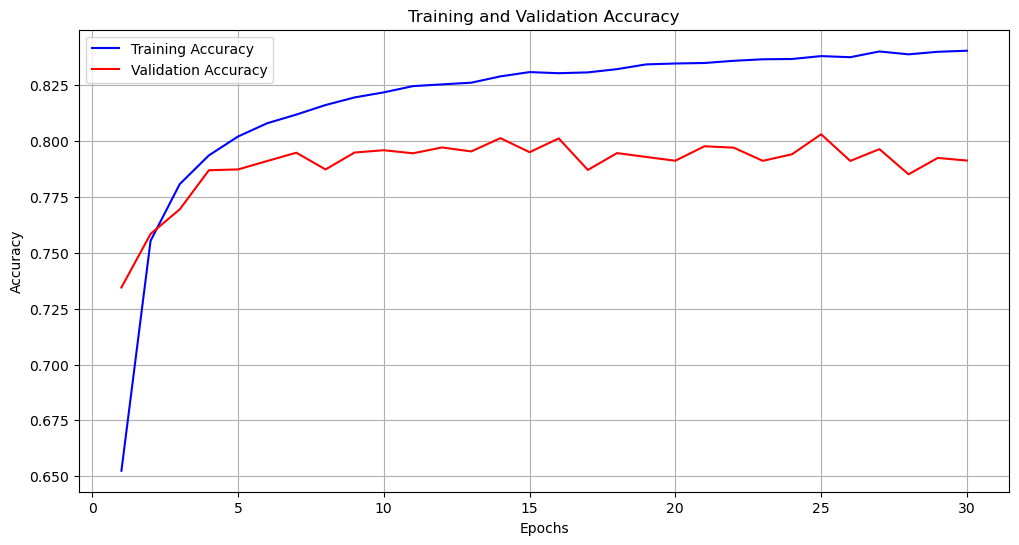

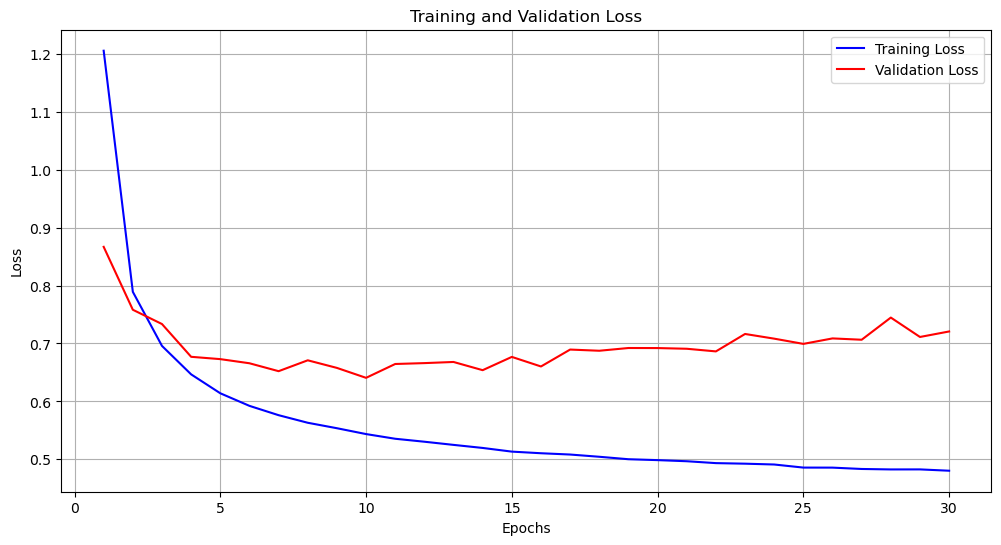

In [42]:
final_metrics = history_MLP.history

# Extract the epochs from the history object
epochs = range(1, len(final_metrics['accuracy']) + 1)

# Extract the accuracy, loss, validation accuracy, and validation loss
accuracy = final_metrics['accuracy']
loss = final_metrics['loss']
val_accuracy = final_metrics['val_accuracy']
val_loss = final_metrics['val_loss']

# Print the final training and validation metrics
print("Accuracy is :", accuracy[-1]*100 , "%")
print("Training Loss is :", loss[-1])
print("Validation Accuracy is :", val_accuracy[-1]*100 , "%")
print("Validation Loss is :", val_loss[-1]*100)

# Evaluate the model on the validation set
test_loss, test_accuracy = best_MLP.evaluate(X_val, y_val_categorical)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot accuracy vs epoch
# We visualize the changes in training accuracy and validation accuracy over each epoch.
# This helps us understand how well the model is learning from the training data and how it performs on unseen validation data.
# The plot provides insights into whether the model is overfitting or underfitting by comparing the training and validation accuracies.
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss vs epoch
# We visualize the changes in training loss and validation loss over each epoch.
# Similar to accuracy, this helps us understand how well the model is learning and whether it is overfitting or underfitting.
# A decrease in training loss and validation loss indicates that the model is learning effectively, while a large gap between
# the two suggests overfitting.
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Obtain predictions from the model
best_MLP_prediction = best_MLP.predict(X_test)

# Calculate and print accuracy on testing model for understanding the how well the model has trained 
accuracy = np.mean(np.argmax(best_MLP_prediction, axis=1) == y_test_labels)
print("Accuracy:", accuracy)

588/588 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
Accuracy: 0.7898936170212766


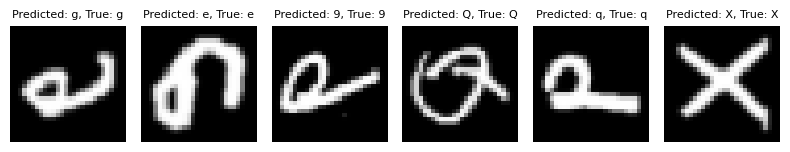

In [45]:
# Extract the top six samples from the testing dataset
top_six_indices = np.arange(6)

# Create a grid of subplots
num_rows = 1
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Iterate through the top six samples and plot them in subplots
for i, idx in enumerate(top_six_indices):
    # Get the image, predicted label, and true label
    image = X_test[idx]
    predicted_label = np.argmax(best_MLP_prediction[idx])
    true_label = np.argmax(y_test_categorical[idx])
    
    # Reshape the image to its original shape (assuming it's grayscale)
    image = image.reshape((28, 28))

    # Plot the image
    ax = axes[i]
    ax.imshow(image, interpolation='none', cmap='gray')
    ax.set_title(f'Predicted: {label_dictionary[predicted_label]}, True: {label_dictionary[true_label]}',fontsize = 8)
    ax.axis('off') # Making the visualization cleaner and focusing solely on the images and their associated labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


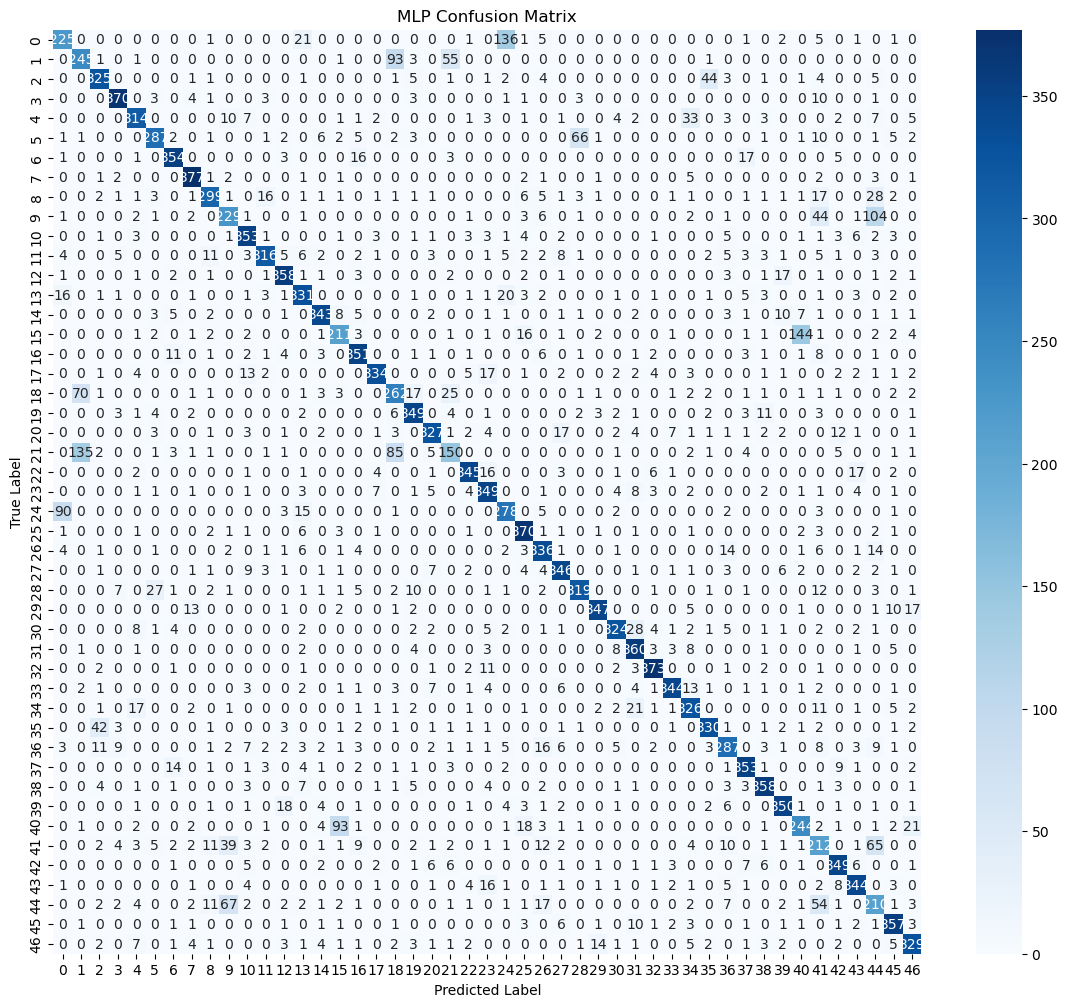

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       400
           1       0.54      0.61      0.57       400
           2       0.80      0.81      0.81       400
           3       0.91      0.93      0.92       400
           4       0.83      0.79      0.81       400
           5       0.84      0.72      0.77       400
           6       0.88      0.89      0.88       400
           7       0.90      0.94      0.92       400
           8       0.84      0.75      0.79       400
           9       0.64      0.57      0.61       400
          10       0.83      0.88      0.85       400
          11       0.89      0.79      0.83       400
          12       0.87      0.90      0.88       400
          13       0.78      0.83      0.81       400
          14       0.89      0.86      0.88       400
          15       0.62      0.53      0.57       400
          16       0.84      0.88      0.86       400


In [46]:
# Calculate confusion matrix for MLP
mlp_conf_matrix = confusion_matrix(np.argmax(true_labels_onehot, axis=1), np.argmax(best_MLP_prediction, axis=1))

# Plot confusion matrix for MLP
plt.figure(figsize=(14, 12))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate classification report for MLP
mlp_classification_report = classification_report(np.argmax(true_labels_onehot, axis=1), np.argmax(best_MLP_prediction, axis=1))
print("MLP Classification Report:")
print(mlp_classification_report)